Gaussian Mixture Models (GMM)

In [117]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA


In [126]:
df = pd.read_csv('DataCleanLabel.csv')    
df.head()

features = [                                   
    'FAVC', 'CAEC','FAF','NCP', 'SMOKE', 'SCC'                   
]

X = df[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


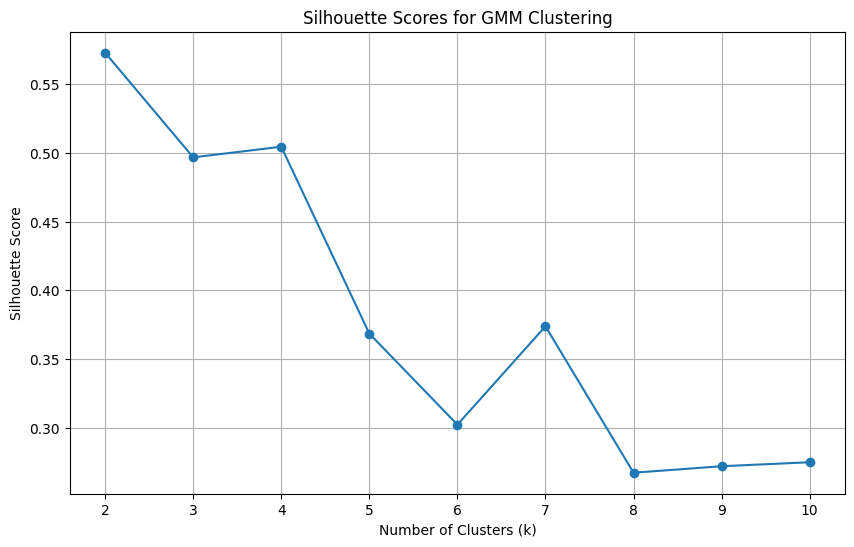

Optimal number of clusters: 2


In [127]:
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for GMM Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')


In [135]:
gmm = GaussianMixture(n_components=4, random_state=42)
labels = gmm.fit_predict(X_scaled)
df['Cluster'] = labels

In [136]:
score = silhouette_score(X_scaled, labels)
print(f"GMM Silhouette Score (n=4): {score:.4f}")

GMM Silhouette Score (n=4): 0.5045


In [140]:
df = pd.read_csv('DataCleanOneHot.csv')
features = [                                   
    'FAVC_yes', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently',
    'FAF',                                     
    'NCP', 'SMOKE_yes', 'SCC_yes'                   
]
X = df[features]

In [142]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
gmm = GaussianMixture(n_components=4, random_state=42)
labels = gmm.fit_predict(X_scaled)
df['Cluster_OneHot'] = labels
score = silhouette_score(X_scaled, labels)
print(f"GMM Silhouette Score with One-Hot Encoding (n=4): {score:.4f}")

GMM Silhouette Score with One-Hot Encoding (n=4): 0.5045


In [138]:
df = pd.read_csv('CleanDataLabelAndOneHot.csv')
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          5 non-null      int64  
 1   Age                             5 non-null      float64
 2   Height                          5 non-null      float64
 3   Weight                          5 non-null      float64
 4   family_history_with_overweight  5 non-null      int64  
 5   FAVC                            5 non-null      int64  
 6   FCVC                            5 non-null      float64
 7   NCP                             5 non-null      float64
 8   SMOKE                           5 non-null      int64  
 9   CH2O                            5 non-null      float64
 10  SCC                             5 non-null      int64  
 11  FAF                             5 non-null      float64
 12  TUE                             5 non-nu

In [119]:
features = [                                   
    'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently',
    'FAF',                                     
    'NCP', 'SMOKE', 'SCC'                   
]
df_features = df[features]

In [120]:
# 3. Scale (MinMax)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_features)

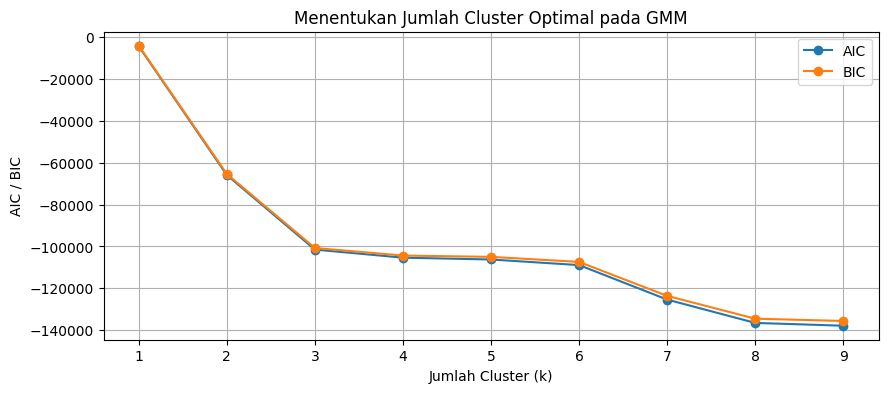

In [121]:
K = range(1, 10)
aic = []
bic = []

for k in K:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    aic.append(gmm.aic(X_scaled))
    bic.append(gmm.bic(X_scaled))

plt.figure(figsize=(10,4))
plt.plot(K, aic, marker='o', label='AIC')
plt.plot(K, bic, marker='o', label='BIC')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('AIC / BIC')
plt.title('Menentukan Jumlah Cluster Optimal pada GMM')
plt.legend()
plt.grid()
plt.show()


In [122]:
# 4. Train GMM (n=4 components)
gmm = GaussianMixture(n_components=4, random_state=42)
labels = gmm.fit_predict(X_scaled)

In [123]:
# 5. Evaluate
score = silhouette_score(X_scaled, labels)
print(f"GMM Silhouette Score (n=4): {score:.4f}")

GMM Silhouette Score (n=4): 0.5045


In [124]:
# 6. Profile Clusters
df['Cluster_GMM'] = labels
print("\n--- GMM Cluster Profiles ---")
print(df.groupby('Cluster_GMM')[features].mean().T)


--- GMM Cluster Profiles ---
Cluster_GMM             0         1         2         3
FAVC             0.797468  0.917619  0.000000  1.000000
CAEC_Sometimes   1.000000  1.000000  0.000000  0.000000
CAEC_no          0.000000  0.000000  0.104651  0.118644
CAEC_Frequently  0.000000  0.000000  0.755814  0.711864
FAF              1.016781  0.995940  1.330357  1.048362
NCP              2.492734  2.699403  2.870750  2.712385
SMOKE            0.341772  0.000000  0.023256  0.046610
SCC              0.670886  0.000000  0.279070  0.072034
